## 組合せ最適化問題
量子コンピュータで最適化問題を解くには、イジングモデルといわれる物理モデルを利用する。

## QUBO定式化
QUBOは問題の答えが小さいほうが正解になるように設定された式です。式の形は、

$$
QUBO = -\sum_i h_i q_i -\sum_{i,j}J_{ij}q_iq_j
$$

となっている。iとjは点を表し、hはバイアス（局所磁場）、Jは相互作用と呼ばれます。この式ではqは量子ビットを表し0か1を取ります（イジングの場合は+1か-1）。
私たちはhとJを問題として設定し、qの値を求めます。

## 問題設定の仕方
問題の設定の仕方は、グラフ問題というものに問題を落とすことで計算できますが、いくつか問題を解くことでコツをつかめます。

主に問題のコスト関数は二種類の式を考える必要があります。

１．小さくしたいコスト関数  
２．満たすべき条件（制約条件）

この二つを別々に設計し、つなげることで実装できます。片方しかない式もあります。

## 使うツール

networkx（ネットワークグラフを書く）  
matplotlib（各種のグラフを書く）  
numpy（数値ライブラリ）

In [1]:
!pip install --quiet networkx matplotlib

## 線形回帰
2次元のデータの組み合わせ$x_i,y_i(i=1,2,3,...,N)$があるときに, 
データをよくフィッティングする直線の方程式
$$
y=ax+b
$$
を求める問題
$i$番目のデータを当てはめると, 
$$
y_i = ax_i+b
$$
の式を得る. 右辺を移行して, 2乗すると, 
$$
\lbrace y_i-(ax_i+b)\rbrace^2=0
$$
$x_i, y_i$はデータなので上の式は0にならないが, 上式が最小になるような$a,b$を求める. 

$$
\sum_i \lbrace y_i-(ax_i+b)\rbrace^2
$$

$a,b$は実数なので, QUBO式にするために精度ベクトル
$$
p=(-1,-0.5,0.5,1)
$$
を用意して実数を作る. 
$$
a=\sum p_j a_j
$$

$$
b=\sum p_j b_j
$$

以上より, QUBO式は, 
最小化したいコスト関数
$$
COST=\sum_i \lbrace y_i-(ax_i+b)\rbrace^2
$$
$$
=\sum_i \lbrace y_i-(\sum_j p_j a_j x_i+\sum_j p_j b_j)\rbrace^2
$$
$a_j,b_j$のバイナリ変数を求める. 

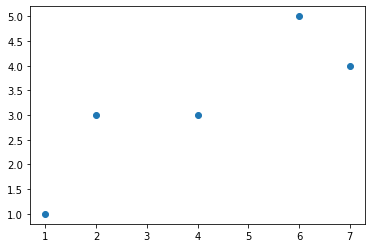

In [13]:
import matplotlib.pyplot as plt

x = np.array([1,2,4,6,7])
y = np.array([1,3,3,5,4])

plt.scatter(x, y)
plt.show()

In [51]:
import numpy as np
from matplotlib import pyplot as plt

N=8
#量子ビット
#q = Array.create('q', shape=N, vartype='BINARY')

p=np.array([-1,-0.5,0.5,1.0])

HA=0
for i in range(5):
    a=0
    b=0
    for j in range(4):
        a += p[j]*q[j]*x[i]
        b += p[j]*q[j+4]
    HA += (y[i]-a-b)**2

H = HA

  q[0] q[1] q[2] q[3] q[4] q[5] q[6] q[7] energy num_oc.
0    1    0    1    1    0    0    0    1   -0.0       1
1    0    0    1    0    0    1    1    1   -0.0       1
2    0    0    1    0    0    1    1    1   -0.0       1
3    0    0    1    0    0    0    0    1   -0.0       1
4    0    0    1    0    0    1    1    1   -0.0       1
5    1    0    1    1    0    1    1    1   -0.0       1
6    0    1    0    1    0    1    1    1   -0.0       1
8    0    0    1    0    0    1    1    1   -0.0       1
9    1    0    1    1    0    0    0    1   -0.0       1
7    0    1    0    1    0    0    0    1    0.0       1
['BINARY', 10 rows, 10 samples, 8 variables]


In [49]:
a=np.array([1,0,1,1])
b=np.array([0,0,0,1])

A=0
B=0
for i in range(4):
    A+=p[i]*a[i]
    B+=p[j]*b[i]
print(A,B)

0.5 1.0


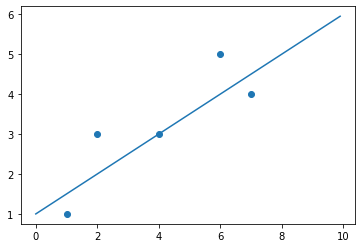

In [45]:
import matplotlib.pyplot as plt

x = np.array([1,2,4,6,7])
y = np.array([1,3,3,5,4])

plt.scatter(x, y)

x = np.arange(0, 10, 0.1)
y = x * 0.5 + 1.0
plt.plot(x, y)
plt.show()